In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import sys
sys.path.append('../scripts')
from autoencoder import TorchEncoder, TorchDecoder
import random

if torch.cuda.is_available():
#     dev = "cuda:0"
    dev = "cpu"
else:
    dev = "cpu"
print(dev)

cpu


In [4]:
def pred(x, enc, dec):
    # x = x[1]
    y = enc(x)
    y = dec(y)
    loss_fn = nn.MSELoss(reduction='none')
    los_val = loss_fn(y, x)
    return torch.mean(los_val, dim=1).cpu().detach().numpy()



(4177, 10)
(130, 10)


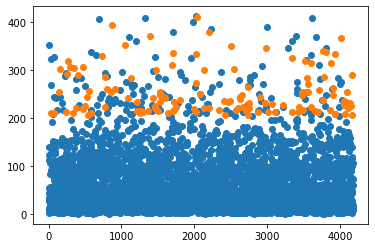

In [10]:
total_anomalies = 130
epoch = 1000
model_path = '../output/model/census2/all_epochs_no_dropouts/'
x_normal = pd.read_csv('/home/saif/MyStuff/UdS/Thesis/Proposal/causal-shapley/output/anomaly_included/census/distance_sex_hpw_workclass/x_test.csv').to_numpy()


encoder_model = model_path + 'ep_' + str(epoch) + '_encoder_model.pth'
decoder_model = model_path + 'ep_' + str(epoch) + '_decoder_model.pth'
print(x_normal.shape)
encoder = TorchEncoder(in_dim=x_normal.shape[1]).to(dev)
decoder = TorchDecoder(out_dim=x_normal.shape[1]).to(dev)
encoder.load_state_dict(torch.load(encoder_model))
decoder.load_state_dict(torch.load(decoder_model))

df_anomalous = pd.read_csv('/home/saif/MyStuff/UdS/Thesis/Proposal/causal-shapley/output/anomaly_included/census/distance_sex_hpw_workclass/x_test.csv')
# anomaly_desciption = 'Features age=78, education=16, education_num=1 were set to give most distance from their neighbours.'
# df_anomalous['education'] = 1
df_anomalous['hours_per_week'] = 78
df_anomalous['workclass'] = 79
df_anomalous['sex'] = 19
# df_anomalous['occupation'] = 25
x_anomalous = df_anomalous.sample(n=total_anomalies).to_numpy()
normal_loss = pred(torch.tensor(x_normal, dtype=torch.float).to(dev), encoder, decoder)
plt.scatter(list(range(len(normal_loss))), normal_loss)
print(x_anomalous.shape)
randomlist = random.sample(range(0, len(normal_loss)), total_anomalies)

anomalous_loss = pred(torch.tensor(x_anomalous, dtype=torch.float).to(dev), encoder, decoder)
plt.scatter(randomlist, anomalous_loss)
plt.show()

In [14]:
losses = pred(torch.tensor(x_normal, dtype=torch.float).to(dev), encoder, decoder)
loss[loss > 200] = 1
loss
# plt.scatter(list(range(len(normal_loss))), normal_loss))
count = 0
for i in losses:
    if i>200:
        count+=1
        
print(count)

158
